<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
movies.sort_values(by='duration', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
...,...,...,...,...,...,...
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

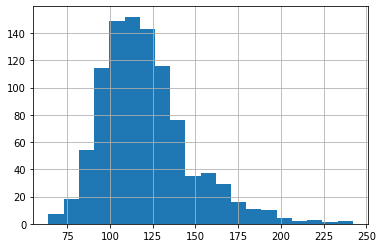

In [7]:
# Answer:
movies.duration.hist(bins=20);

#### Use a box plot to display that same data.

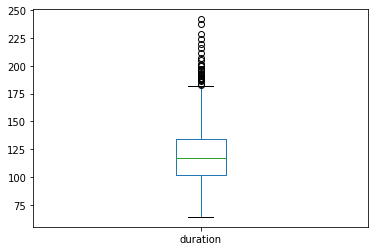

In [8]:
# Answer:
movies.duration.plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

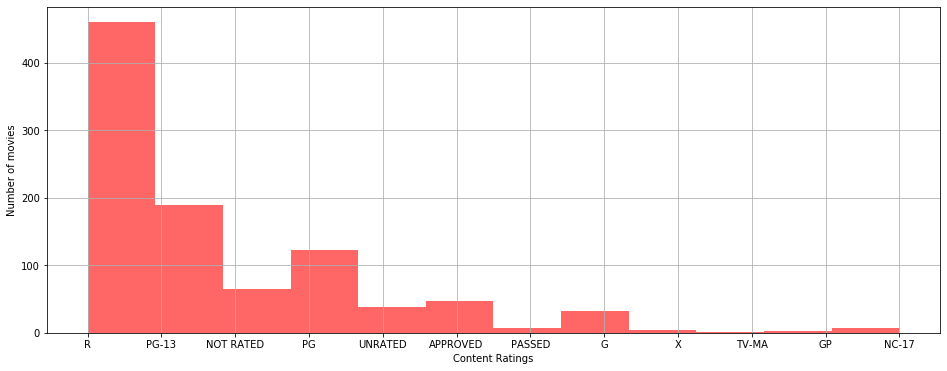

In [11]:
# Answer:
movies['content_rating'].hist(bins=12, figsize=(16, 6), color='red', alpha=0.6)
plt.xlabel('Content Ratings');
plt.ylabel('Number of movies');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:
#movies['content_rating'].unique()
ratings = ["NOT RATED", "APPROVED", "PASSED", "GP"]
ratings_mask = movies.content_rating.isin(ratings)
movies.loc[ratings_mask, 'content_rating'] = "UNRATED"

In [13]:
movies['content_rating'].unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'X', nan, 'TV-MA', 'NC-17'],
      dtype=object)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [14]:
# Answer:
ratings_again = ["X", "TV-MA"]
ratings_mask2 = movies.content_rating.isin(ratings_again)
movies.loc[ratings_mask2, 'content_rating'] = "NC-17"

In [15]:
movies.content_rating.unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'NC-17', nan], dtype=object)

#### Count the number of missing values in each column.

In [16]:
# Answer:
#movies[movies.isnull()].sum()
#movies['star_rating'].value_counts(dropna=False)
#movies['title'].value_counts(dropna=False)
#movies['genre'].value_counts(dropna=False)
#movies['duration'].value_counts(dropna=False)
#movies['actors_list'].value_counts(dropna=False)

movies['content_rating'].value_counts(dropna=False)


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
NaN          3
Name: content_rating, dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [21]:
# Answer:
movies[movies['content_rating'].isnull()].head()
#movies.at[187, 'content_rating'] = "PG"
#movies.at[649, 'content_rating'] = "PG"
#movies.at[936, 'content_rating'] = "NC-17"

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [23]:
# Answer:
time_filter1 = movies['duration'] >= 120
time_filter2 = movies['duration'] < 120

#movies[time_filter1].star_rating.mean()
movies[time_filter2].star_rating.mean()

#It appears that the longer the movie, the higher the ratings

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

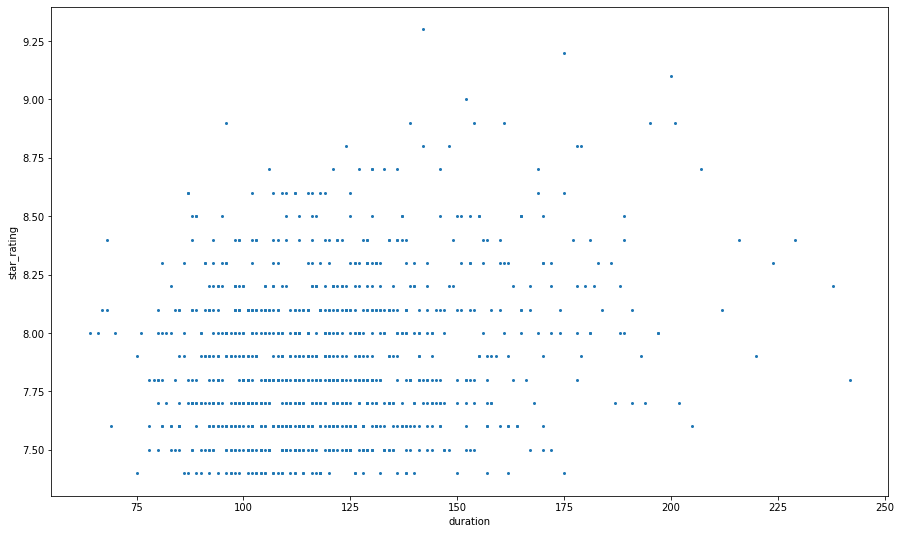

In [24]:
# Answer: The data points seem quite spread out, but more skewed to the left, it is a weak relationship between the two
movies.plot.scatter(x='duration', y='star_rating', s=4, figsize=(15, 9));

#### Calculate the average duration for each genre.

In [25]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

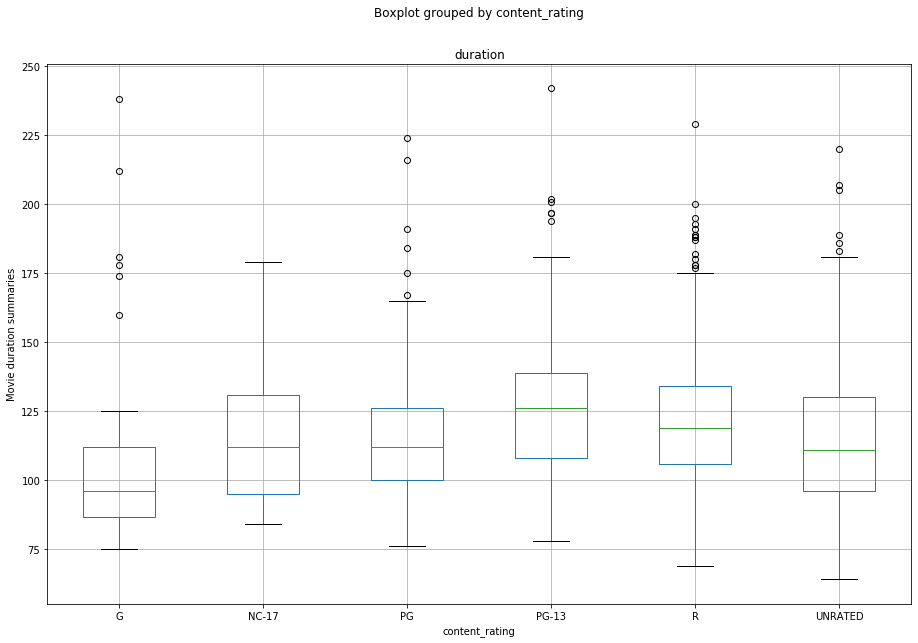

In [49]:
# Answer:
#movies['content_rating'].value_counts()
#movies['content_rating'].value_counts().plot(kind='bar');
movies.sort_values('duration').boxplot(column='duration', by='content_rating',figsize=(15,10));
#plt.xlabel('Content Ratings');
plt.ylabel('Movie duration summaries');


#### Determine the top rated movie (by star rating) for each genre.

In [61]:
# Answer:
movies.groupby('genre')['title', 'star_rating'].max()

#top_rated_filter = movies.groupby('genre')['star_rating'].max(axis=1)
#top_rated = movies[top_rated_filter]
#top_rated


,title,star_rating
genre,,
Action,Yojimbo,9.0
Adventure,True Grit,8.9
Animation,Wreck-It Ralph,8.6
Biography,Walk the Line,8.9
Comedy,Zombieland,8.6
Crime,Zodiac,9.3
Drama,Zulu,8.9
Family,Willy Wonka & the Chocolate Factory,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [76]:
# Answer: I CAN'T FIGURE THIS OUT!
#movies['title'].duplicated(keep=False).any()
#movies.title.duplicated(keep='first')
movies[movies['title'].duplicated() == True]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NC-17,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [90]:
# Answer:
#movies.genre.value_counts() >= 10
genre_high_count = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies['genre'].isin(genre_high_count)]


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [124]:
# Answer:
genre_values = movies.genre.value_counts()
list_rel_genre = genre_values[genre_values >= 10].index.to_list()
list_rel_genre

movies[movies['genre'].isin(list_rel_genre)]
#high_genre_movies = movies[genre_values >= 10].index.to_list()
#high_genre_movies
#movies[movies['genre'].isin(genre_high_count2)]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [132]:
# Answer:
ave_star_rating = movies.groupby('genre')['star_rating'].agg('mean')
ave_star_rating = ave_star_rating[ave_star_rating >= 8]
ave_star_rating

genre
Film-Noir    8.033333
History      8.000000
Western      8.255556
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [136]:
# Answer:
count_star_rating = movies.groupby('genre')['star_rating'].agg(['mean', 'count'])
count_star_rating = count_star_rating[count_star_rating['count'] <= 10]
count_star_rating

,mean,count
genre,,
Family,7.850000,2
Fantasy,7.700000,1
Film-Noir,8.033333,3
History,8.000000,1
Sci-Fi,7.920000,5
Thriller,7.680000,5
Western,8.255556,9


## Bonus

#### Figure out something "interesting" using the actors data!

In [150]:
# NB - Hex codes are used for accents in actor names, data is not consistent, i.e. names start with u or u\. There are no duplicated values.

# Filter Dataframe based on movies with star_rating higher than 8. Al Pacino appears twice.
# Filter actors_list for list with more than 4 actors. 

#movies.actors_list.sort_values().values
#movies.dtypes
#movies[movies['actors_list'].duplicated() == True]

#movies.groupby('genre')['actors_list', 'star_rating'].max()

#star_filter = movies['star_rating'] >= 9.0
#movies[star_filter]

#TO DO!!! Remove all u and u\ from start of names
def large_actor_list(df):
    for column in df['actors_list']:
        column_contents = df[column]
        for actor_list in column_contents:
            if len(actor_list) == 4:
                return column_list
            
print(large_actor_list(movies))

KeyError: "[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']"